# Economic sentiment and confidence indicators by sector - monthly data

- EI_BSSI_M_R2
- id:["freq","indic","s_adj","geo","time"]
- "indic":"label":"Indicator"
    - "BS-CCI-BAL":"Construction confidence indicator",
    - "BS-ESI-I":"Economic sentiment indicator",
    - "BS-ICI-BAL":"Industrial confidence indicator",
    - "BS-RCI-BAL":"Retail confidence indicator",
    - "BS-CSMCI-BAL":"Consumer confidence indicator",
    - "BS-SCI-BAL":"Services confidence indicator"
- "s_adj":"label":"Seasonal adjustment"
    - "NSA":"Unadjusted data (i.e. neither seasonally adjusted nor calendar adjusted data)",
    - "SA":"Seasonally adjusted data, not calendar adjusted data"
- https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/nama_10_a64_p5?geo=IT&time=2023
- https://ec.europa.eu/eurostat/databrowser/product/page/teibs010



- "BS-ESI-I",        # Economic sentiment (composito)
- "BS-ICI-BAL",      # Industria
- "BS-SCI-BAL",      # Servizi
- "BS-CCI-BAL",      # Costruzioni
- "BS-RCI-BAL",      # Commercio al dettaglio
- "BS-CSMCI-BAL"     # Consumi

L'indicatore di sentimento economico (ESI) è un indicatore composito prodotto dalla direzione generale degli Affari economici e finanziari (DG ECFIN) della Commissione europea. Il suo obiettivo è monitorare la crescita del PIL a livello degli Stati membri, dell'UE e dell'area dell'euro. L'ISE è una media ponderata dei saldi delle risposte a domande selezionate rivolte alle imprese in cinque settori coperti dalle indagini UE sulle imprese e ai consumatori e ai consumatori. I settori interessati sono l'industria (peso 40 %), i servizi (30 %), i consumatori (20 %), il commercio al dettaglio (5 %) e l'edilizia (5 %). I saldi sono costruiti come differenza tra le percentuali degli intervistati che danno risposte positive e negative. Gli aggregati dell'UE e dell'area dell'euro sono calcolati sulla base dei risultati nazionali e destagionalizzati. L'ISE è ridotto a una media a lungo termine di 100 e a una deviazione standard di 10. Pertanto, valori superiori a 100 indicano un sentimento economico superiore alla media e viceversa. I dati sono destagionalizzati (SA). Ulteriori dettagli sulla costruzione dell'ISE sono reperibili nella guida per gli utenti del programma congiunto armonizzato dell'UE per le indagini sulle imprese e sui consumatori. L'indicatore di sentimento economico (ESI) è un indicatore composito prodotto dalla direzione generale degli Affari economici e finanziari (DG ECFIN) della Commissione europea. Il suo obiettivo è monitorare la crescita del PIL a livello degli Stati membri, dell'UE e dell'area dell'euro. L'ISE è una media ponderata dei saldi delle risposte a domande selezionate rivolte alle imprese in cinque settori coperti dalle indagini UE sulle imprese e ai consumatori e ai consumatori. I settori interessati sono l'industria (peso 40 %), i servizi (30 %), i consumatori (20 %), il commercio al dettaglio (5 %) e l'edilizia (5 %). I saldi sono costruiti come differenza tra le percentuali degli intervistati che danno risposte positive e negative. Gli aggregati dell'UE e dell'area dell'euro sono calcolati sulla base dei risultati nazionali e destagionalizzati. L'ISE è ridotto a una media a lungo termine di 100 e a una deviazione standard di 10. Pertanto, valori superiori a 100 indicano un sentimento economico superiore alla media e viceversa. I dati sono destagionalizzati (SA). Ulteriori dettagli sulla costruzione dell'ISE sono reperibili nella guida per gli utenti del programma congiunto armonizzato dell'UE per le indagini sulle imprese e sui consumatori.

https://data.europa.eu/data/datasets/c04buuz6wxiqgjkhpwlug?locale=it

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("D:/PKM/Github/Eurostat/codice")  # Aggiunge il path dove si trova il modulo
from eurostat_utils import fetch_eurostat_data # questa è la mia funzione per estrarre i json

sys.path.append("D:/PKM/Github/Eurostat/codice")  # Aggiunge il path dove si trova il modulo
from eurostat_utils import fetch_eurostat_data # questa è la mia funzione per estrarre i json
df = fetch_eurostat_data("EI_BSSI_M_R2", {
    'indic': ["BS-CCI-BAL","BS-ESI-I","BS-ICI-BAL","BS-RCI-BAL","BS-CSMCI-BAL","BS-SCI-BAL"],
    's_adj': 'SA',
    'geo': ['EA20','IT'],
})

In [2]:
# filtri
df = df[df["indic_code"] != "BS-ESI-I"]
df = df[df['time'] > '2020-01-01']

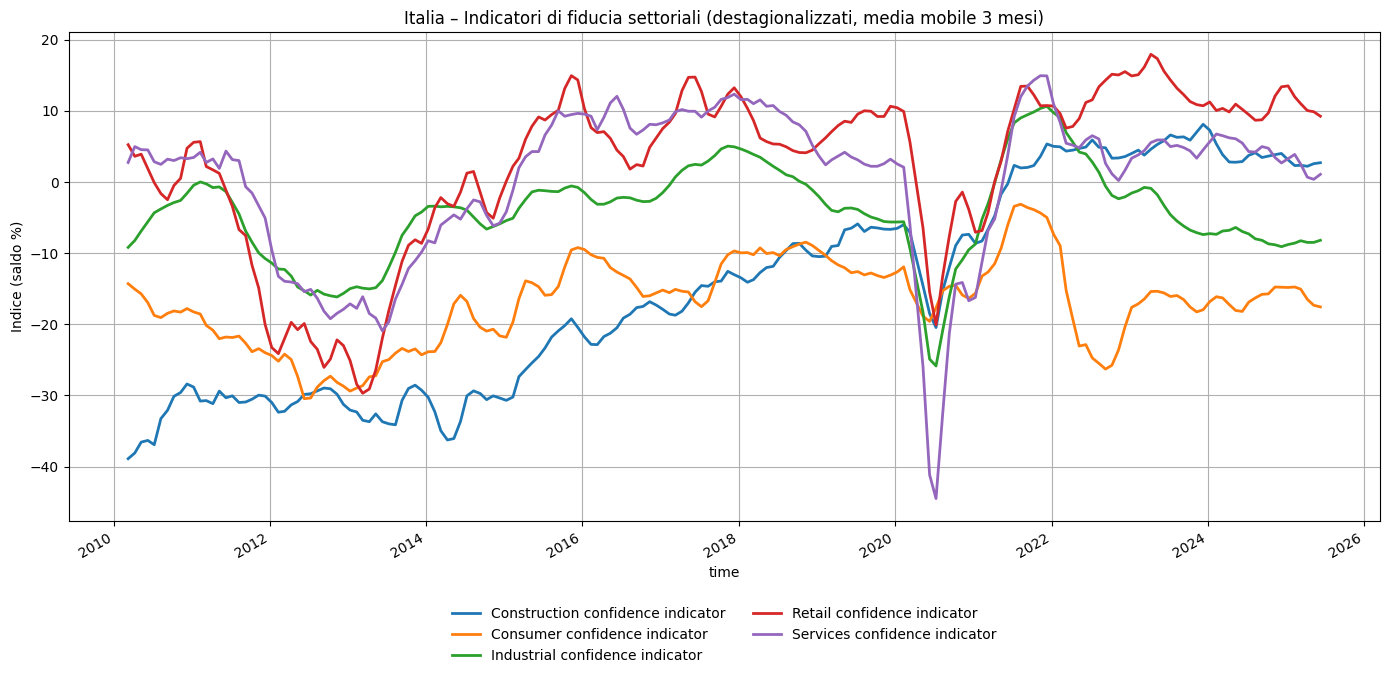

In [20]:
# 1. Filtro solo Italia
df_it = df[df["geo_code"] == "IT"]

# 2. Pivottizza: righe = tempo, colonne = indicatore
pivot_df = (
    df_it.pivot(index="time", columns="indic_label", values="value")
    .sort_index()
)

# 3. Media mobile 3 mesi (opzionale, per levigare)
smoothed = pivot_df.rolling(window=3).mean()

# 4. Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 6))
smoothed.plot(ax=plt.gca(), linewidth=2) # media mobile
# pivot_df.plot(ax=plt.gca(), linewidth=2) # raw

plt.title("Italia – Indicatori di fiducia settoriali (destagionalizzati, media mobile 3 mesi)")
plt.ylabel("Indice (saldo %)")
plt.grid(True)
plt.tight_layout()


# 👉 Legenda sotto il grafico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
           ncol=2, fancybox=True, shadow=False, frameon=False)

plt.show()


In [29]:
df['time'].max()

Timestamp('2025-06-10 00:00:00')

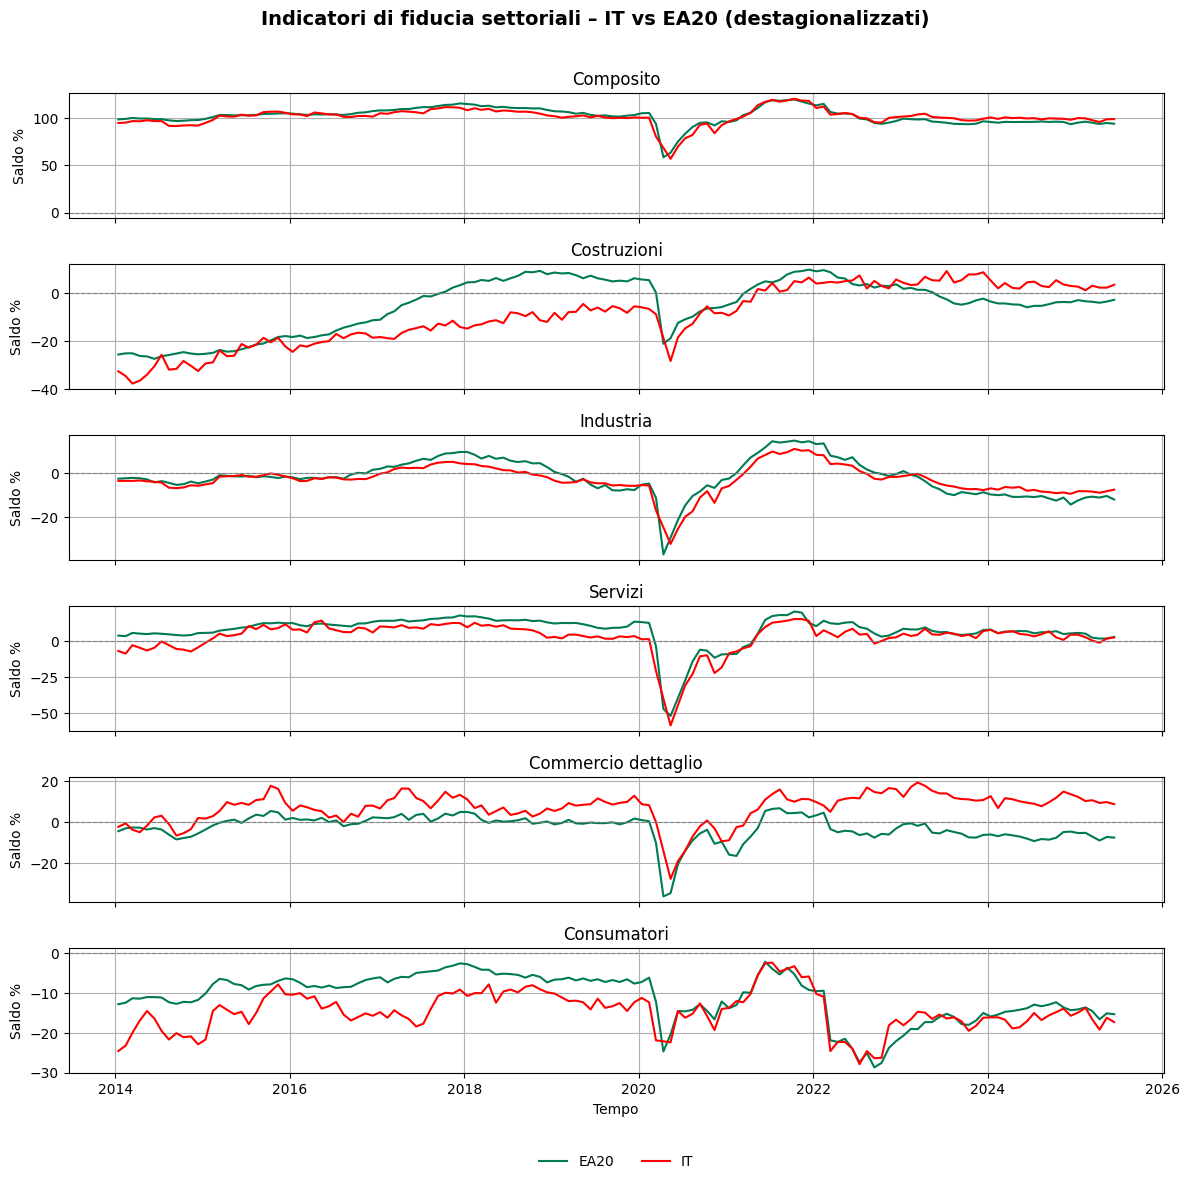

In [16]:
import matplotlib.pyplot as plt

# Filtra dati
df_facet = df[
#    (df["indic_code"] != "BS-ESI-I") &
    (df["geo_code"].isin(["IT", "EA20"])) 
     & (df["time"] > "2013-12-31")
].copy()

# Mappa etichette leggibili
label_map = {
    "BS-ESI-I": "Composito",
    "BS-CCI-BAL": "Costruzioni",
    "BS-ICI-BAL": "Industria",
    "BS-SCI-BAL": "Servizi",
    "BS-RCI-BAL": "Commercio dettaglio",
    "BS-CSMCI-BAL": "Consumatori"
}
df_facet["indic_label"] = df_facet["indic_code"].map(label_map)

# Ordine fisso indicatori
indicators_order = ["Composito","Costruzioni", "Industria", "Servizi", "Commercio dettaglio", "Consumatori"]

# Facet plot 6×1
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 12), sharex=True)
fig.subplots_adjust(hspace=0.35)

for i, indic in enumerate(indicators_order):
    ax = axes[i]
    for geo, color in zip(["EA20", "IT"], ["#007a53", "#FF0000"]):
        subset = df_facet[
            (df_facet["indic_label"] == indic) &
            (df_facet["geo_code"] == geo)
        ]
        ax.plot(subset["time"], subset["value"], label=geo, color=color)
    
    ax.set_title(indic)
    ax.axhline(0, color='grey', linewidth=0.8, linestyle='--')
    ax.grid(True)
    if i == 5:
        ax.set_xlabel("Tempo")
    ax.set_ylabel("Saldo %")

# Legenda solo nell'ultimo
#axes[-1].legend(loc='lower right')

# 👉 Legenda sotto il grafico
axes[-1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.55),
           ncol=2, fancybox=True, shadow=False, frameon=False)


fig.suptitle("Indicatori di fiducia settoriali – IT vs EA20 (destagionalizzati)", fontsize=14, fontweight='bold' )
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


### 1. SOLO INDICATORE COMPOSITO (line chart IT vs EA20)

| Codice         | Settore                    |
| -------------- | -------------------------- |
| `BS-CCI-BAL`   | **Costruzioni**            |
| `BS-ICI-BAL`   | **Industria**              |
| `BS-RCI-BAL`   | **Commercio al dettaglio** |
| `BS-CSMCI-BAL` | **Consumatori**            |
| `BS-SCI-BAL`   | **Servizi**                |


In [15]:
df['indic_code'].unique()

array(['BS-CCI-BAL', 'BS-ESI-I', 'BS-ICI-BAL', 'BS-RCI-BAL',
       'BS-CSMCI-BAL', 'BS-SCI-BAL'], dtype=object)

Colonne disponibili: ['EA20', 'IT']


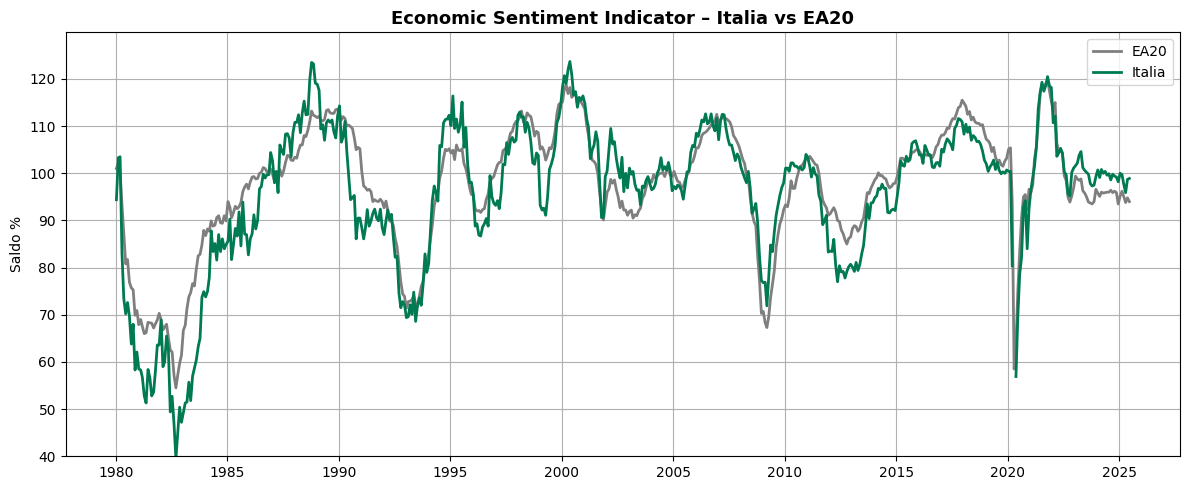

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Pulizia preventiva (se non già fatta)
df['geo_code'] = df['geo_code'].str.strip().str.upper()

# Filtro per l’indicatore composito
df_esi = df[df['indic_code'] == 'BS-ESI-I'].copy()

# Pivot: righe = tempo, colonne = geo_code (IT, EA20)
df_pivot = df_esi.pivot(index='time', columns='geo_code', values='value')

# Controllo colonne disponibili
print("Colonne disponibili:", df_pivot.columns.tolist())

# Se sono presenti 'IT' ed 'EA20', si procede con il grafico
if 'IT' in df_pivot.columns and 'EA20' in df_pivot.columns:
    plt.figure(figsize=(12, 5))
    plt.plot(df_pivot.index, df_pivot['EA20'], label='EA20', color='#7F7F7F', linewidth=2)
    plt.plot(df_pivot.index, df_pivot['IT'], label='Italia', color='#007A53', linewidth=2)
    plt.axhline(0, linestyle='--', color='gray')
    plt.title("Economic Sentiment Indicator – Italia vs EA20", fontsize=13, fontweight='bold')
    plt.ylabel("Saldo %")
    plt.ylim(bottom=40)
    #plt.xlabel("Tempo")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Attenzione: manca IT o EA20 nel DataFrame.")





Perfetto, il grafico mostra l’**Economic Sentiment Indicator (ESI)** per **Italia** e **EA20** dal 1980 al 2025. Di seguito una **lettura critica e commento strutturato**, adatto anche per un post LinkedIn, un report o una slide di scenario:

---

## 🧠 **Economic Sentiment Indicator – Italia vs EA20**

### 📌 **Cosa mostra**

* **Linea grigia**: Area Euro (EA20)
* **Linea verde**: Italia
* **Asse Y**: saldo percentuale dell’indicatore (media storica = 100)
* **Asse X**: serie storica dal 1980 al 2025
* **Soglia 100**: linea base della fiducia media di lungo periodo

---

### 📈 **Lettura dell’andamento storico**

#### 🕰️ **1980-1995**: Alta volatilità

* Forte instabilità sia per Italia che per EA20, ma **l’Italia risente di crisi profonde** (es. 1983 e 1993).
* Gap occasionali a favore dell’Italia durante riprese cicliche (fine anni ‘80, inizio ‘90).

#### 📉 **2008-2009**: Grande recessione

* **Crollo simultaneo** di ESI in Italia e nell’Eurozona.
* Rimbalzo successivo, ma **Italia resta sempre più fragile**.

#### 🔻 **2011-2013**: Crisi del debito sovrano

* Distacco netto: **EA20 recupera**, l’Italia **precipita sotto 90**.
* Riflette spread, austerità e caduta della fiducia interna.

#### 🔼 **2015-2018**: Fase espansiva europea

* Salita dell’ESI sopra quota 100.
* Italia segue ma **rimane sistematicamente sotto EA20**, segnalando un **divario strutturale di fiducia**.

#### 🌪️ **2020-2021**: Pandemia

* **Shock simmetrico iniziale**, ma **l’Italia rimbalza più forte e più in alto**.
* Probabile effetto delle aspettative positive legate al PNRR.

#### 🧊 **2022-2025**: Normalizzazione e incertezza

* L’ESI scende gradualmente.
* Italia ed EA20 **tornano allineate**, entrambe **sotto quota 100**, segno di **fiducia fragile** nel contesto post-pandemico e geopolitico.

---

### 🔍 **Focus 2025**

* Entrambe le curve **non mostrano segni di risalita** nel 2025.
* In un contesto di **dazi USA al 30%** e **rallentamento globale**, la fiducia resta **sotto media**.
* La **mancanza di divergenza tra Italia ed EA20** suggerisce che le preoccupazioni siano **comuni**: inflazione, stretta monetaria, geopolitica.

---

### ✍️ Frase da usare in un report o post

> Nel secondo semestre 2025, l’ESI segnala una fiducia economica ancora fragile. Dopo il rimbalzo post-pandemico, Italia ed EA20 convergono su livelli inferiori alla media storica. I timori legati ai dazi USA, alla tenuta della domanda estera e ai tassi elevati frenano le aspettative, riflettendo un clima di **attesa e cautela generalizzata**.

---

### 📌 Vuoi aggiungere?

Posso:

* evidenziare **eventi macroeconomici** (es. pandemia, crisi debito, dazi 2025)
* calcolare e plottare **gap mensile IT - EA20**
* costruire un **indicatore sintetico della divergenza strutturale**.

Fammi sapere. Vuoi anche la **versione markdown** del commento per usarlo direttamente su Medium o LinkedIn?


Ecco un modulo già pronto per inserire il commento nel tuo **Documento Semestrale**, completo di contesto, analisi e dati aggiornati – ideale per un paragrafo o una slide nel capitolo sull’economia europea o sui rischi macro:

---

## 📄 **Paragrafo da integrare (bozza)**

**Economic Sentiment Indicator (ESI) – Analisi secondo semestre 2025**

L’**Economic Sentiment Indicator (ESI)**, che misura il sentiment economico aggregato di imprese e consumatori, si posiziona a **98,9 punti nel giugno 2025** in Italia, e attorno a **94,8 nell’Area Euro**, indicando una fiducia ancora al di sotto della media storica (*≥ 100*) ([Trading Economics][1]). Questo dato fa eco alle tensioni sulla catena dei dazi USA–UE e al rallentamento produttivo in Italia, dove l’output industriale è sceso dello 0,7 % a maggio e accumula già 15 mesi consecutivi di contrazione .

Nello stesso periodo l’ESI europeo ha mostrato un timido rimbalzo (+1 punto in maggio), principalmente trainato dalla componente retail e consumatori ([Istat][2]). Tuttavia, l’indice resta sotto 100, segno di un sentimento **globalmente debole**.

### 🔍 **Punti salienti da evidenziare nel grafico:**

* 📉 **ESI Italia 98,9 (giugno 2025)** vs **Eurozona 94,8**: seppure sotto la media, l’Italia mostra un risultato leggermente migliore ([LinkedIn][3], [Trading Economics][1]).
* 🏭 Il calo dell’output industriale del 0,7 % a maggio è un campanello d’allarme: 15 mesi consecutivi di contrazione confermano una debolezza strutturale ([Reuters][4]).
* 💳 Nonostante il sentiment imprenditoriale (business morale) in Italia sia salito a 93,9 in giugno, la fiducia dei consumatori è scesa lievemente a 96,1 ([Reuters][5]).

---

### 📊 **Interpretazione per i lettori**

* L’indice **sotto soglia 100** segnala una fiducia ancora insufficiente per sostenere una ripresa duratura nel secondo semestre.
* L’Italia risulta meno debole dell’Area Euro, ma il gap resta modesto e non sufficiente a invertire la tendenza negativa.
* La combinazione di **export stagnanti**, **tensioni commerciali e incertezza macro**, insieme a un **sentiment dei consumatori debole**, tempera le prospettive di crescita.

---

### 🧩 **Testo finale consigliato per la semestrale**

> “Nel secondo semestre 2025 l’ESI segna **98,9 punti per l’Italia** e **94,8 per l’Area Euro**, riflettendo una fiducia ancora sotto la media storica. L’output industriale italiano è sceso dello 0,7 % a maggio, confermando una fase di contrazione continua, mentre la fiducia delle imprese mostra segnali di ripresa (+93,9 in giugno). Tuttavia, la componente consumatori rimane debole (96,1), segnalando un clima di cautela diffusa. Complessivamente, il sentiment appare sottotono, con i rischi provenienti dall’esterno – dazi USA e frenata globale – che continuano a pesare.”

---

* [Reuters](https://www.reuters.com/markets/europe/italy-industry-output-falls-07-mm-may-far-weaker-than-forecast-2025-07-10/?utm_source=chatgpt.com)
* [Reuters](https://www.reuters.com/markets/europe/italy-business-sentiment-improves-june-consumer-morale-slips-2025-06-27/?utm_source=chatgpt.com)
* [The Guardian](https://www.theguardian.com/business/live/2025/may/27/tesla-sales-europe-musk-markets-us-eu-tariff-delay-economy-business-live-news?utm_source=chatgpt.com)

[1]: https://tradingeconomics.com/euro-area/economic-optimism-index?utm_source=chatgpt.com "Euro Area Economic Sentiment Indicator"
[2]: https://www.istat.it/wp-content/uploads/2025/05/Note_May_2025.pdf?utm_source=chatgpt.com "[PDF] Istat - May 9th, 2025"
[3]: https://www.linkedin.com/pulse/economic-insights-april-2025-sentiment-index-consumer-anna-musiienko-zi9of?utm_source=chatgpt.com "Economic Insights April 2025: Economic Sentiment Index ... - LinkedIn"
[4]: https://www.reuters.com/markets/europe/italy-industry-output-falls-07-mm-may-far-weaker-than-forecast-2025-07-10/?utm_source=chatgpt.com "Italy industry output falls in May in renewed sign of weakness"
[5]: https://www.reuters.com/markets/europe/italy-business-sentiment-improves-june-consumer-morale-slips-2025-06-27/?utm_source=chatgpt.com "Italy business sentiment improves in June but consumer morale slips"


2. DIFFERENZA ITALIA - EA20 (grafico gap)

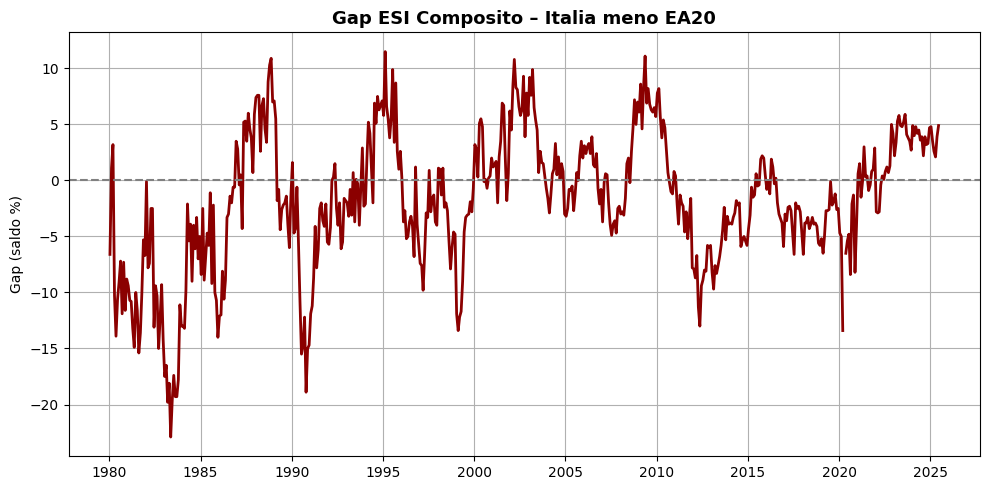

In [24]:
df_pivot['gap'] = df_pivot['IT'] - df_pivot['EA20']

plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot['gap'], color='darkred', linewidth=2)
plt.axhline(0, linestyle='--', color='gray')
plt.title("Gap ESI Composito – Italia meno EA20", fontsize=13, fontweight='bold')
plt.ylabel("Gap (saldo %)")
plt.grid(True)
plt.tight_layout()
plt.show()


### ESI Italia vs EA20 con Y ≥ 40%

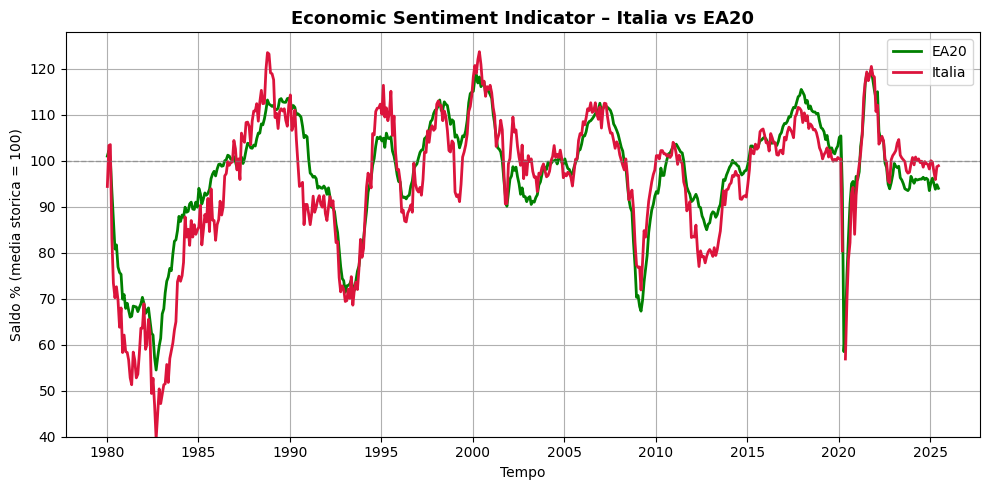

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Pulizia codice geografico
df['geo_code'] = df['geo_code'].str.strip().str.upper()

# Filtro solo ESI
df_esi = df[df['indic_code'] == 'BS-ESI-I'].copy()

# Pivot
df_pivot = df_esi.pivot(index='time', columns='geo_code', values='value')

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_pivot.index, df_pivot['EA20'], label='EA20', color='green', linewidth=2)
plt.plot(df_pivot.index, df_pivot['IT'], label='Italia', color='crimson', linewidth=2)
plt.axhline(100, linestyle='--', color='gray', linewidth=1, alpha=0.6)
plt.ylim(bottom=40)  # 👈 imposta il minimo dell'asse Y
plt.title("Economic Sentiment Indicator – Italia vs EA20", fontsize=13, fontweight='bold')
plt.ylabel("Saldo % (media storica = 100)")
plt.xlabel("Tempo")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
